# Data Preprocessing and Training:

### 1. Importing the libraries:

In [ ]:
# pip install imbalanced-learn
# pip install category_encoders

In [38]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 2. Load the Data:

In [39]:
churndata = pd.read_csv('./telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv')

In [40]:
churndata.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [41]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

The Column "Customer Status" is our response variable of interest in this analysis. The reasons for Churn has its records in the "Churn Category" and "Churn Reason" columns.
   

### 3. Preprocessing Data:

#### 3.1 Dealing with Missing Data:

The last two columns shows the count and the percentage of the missing values for the columns.

In [42]:
missing1 = pd.concat([churndata.isnull().sum(), 100 * churndata.isnull().mean()], axis=1)
missing1.columns=['count', '%']
missing2 = churndata.isnull().any()
pd.concat([missing2, missing1], axis=1)

,0,count,%
Customer ID,False,0,0.000000
Gender,False,0,0.000000
Age,False,0,0.000000
Married,False,0,0.000000
Number of Dependents,False,0,0.000000
City,False,0,0.000000
Zip Code,False,0,0.000000
Latitude,False,0,0.000000
Longitude,False,0,0.000000
Number of Referrals,False,0,0.000000


In [43]:
df1 = churndata[["Phone Service","Avg Monthly Long Distance Charges","Multiple Lines"]]
df1[df1['Avg Monthly Long Distance Charges'].isnull()]

,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines
10,No,NaN,NaN
14,No,NaN,NaN
16,No,NaN,NaN
19,No,NaN,NaN
25,No,NaN,NaN
...,...,...,...
6979,No,NaN,NaN
6980,No,NaN,NaN
6996,No,NaN,NaN
7016,No,NaN,NaN


From the dataframe slice above, we see that for those who don't have Home Phone service, the Average monthly long distance charges and Multiple lines shows NaN value. We will replace the NaN of "Avg Monthly Long Distance Charges" with 0 and "Multiple Lines" with " No" for those observations who didn't subscribe for Home Phone service."
   

In [44]:
churndata["Avg Monthly Long Distance Charges"].fillna(0, inplace=True)
churndata["Multiple Lines"].fillna("No", inplace=True)

In [45]:
df2 = churndata[["Internet Type", "Avg Monthly GB Download", "Online Security", "Online Backup","Device Protection Plan", "Premium Tech Support", "Streaming TV", "Streaming Movies", "Streaming Music", "Unlimited Data"]]
df2[df2.isna().any(axis=1)].head()

,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Again, from the dataframe we see that the variables: "Internet Type", "Avg Monthly GB Download", "Online Security", "Online Backup", "Device Protection Plan", "Premium Tech Support", "Streaming TV", "Streaming Movies", "Streaming Music", "Unlimited Data" - these columns contain NaN for those observations customers who don't have Internet Services. So, we replace the NaN values with corresponding values to the columns mentiones above."
   

In [46]:
del [[missing1, missing2, df1,df2]]  # these are unnecessary for further analysis

In [47]:
churndata["Internet Type"].fillna("None", inplace=True)
churndata["Avg Monthly GB Download"].fillna("0", inplace=True)
churndata["Online Security"].fillna("No", inplace=True)
churndata["Online Backup"].fillna("No", inplace=True)
churndata["Device Protection Plan"].fillna("No", inplace=True)
churndata["Premium Tech Support"].fillna("No", inplace=True)
churndata["Streaming TV"].fillna("No", inplace=True)
churndata["Streaming Movies"].fillna("No", inplace=True)
churndata["Streaming Music"].fillna("No", inplace=True)
churndata["Unlimited Data"].fillna("No", inplace=True)

In [48]:
churndata.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                  

In [49]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

#### 3.2 Feature Selection:

##### 3.2.1. Delete Unncessary Columns:

In [50]:
churndata.drop(["Customer ID","Zip Code","Latitude","Longitude","Churn Category","Churn Reason"],axis=1,inplace=True)

##### 3.2.2. Feature Elimination:

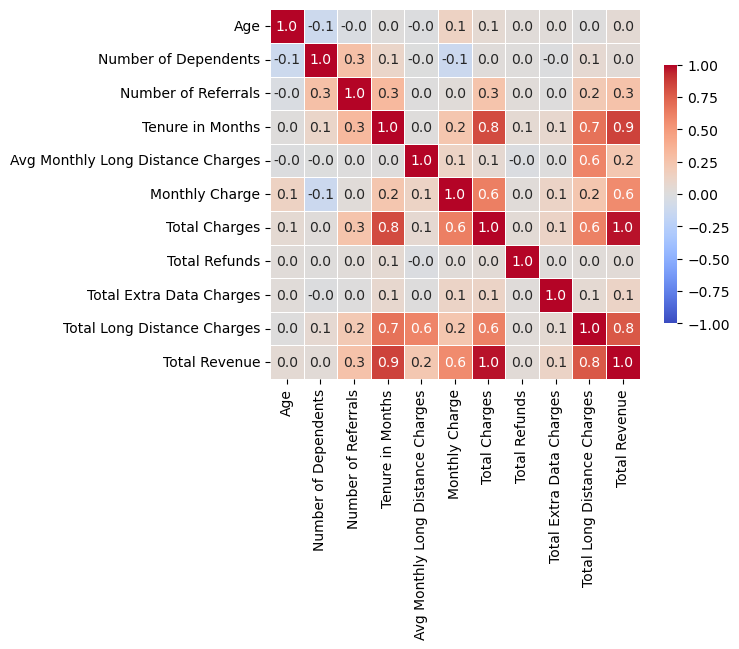

In [51]:
sns.heatmap(churndata.corr(), cmap='coolwarm', vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7},
            annot=True,
            fmt=".1f"
           );

From the data dictionary file, we know that- 
Total Revenue = Total Charges - Total Refunds + Total Extra Data Charges + Total Long Distance Charges.


Also, from the matrix bove, we see that-
Tenure in Months 'correlates with' Total Revenue, Total Long Distance Charges, Total Charges

The association can be shown as below-:

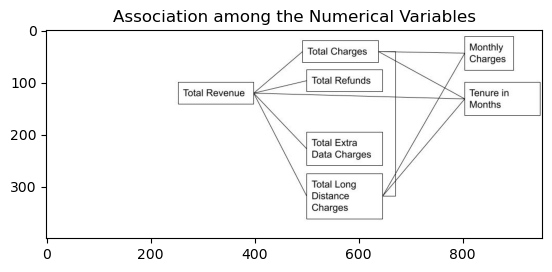

In [52]:
from matplotlib import image as mpimg

plt.title("Association among the Numerical Variables")

image = mpimg.imread("Chart.jpg")
plt.imshow(image)
plt.show()


We will keep the following vabriables - Monthly Charges, Tenure in Months, Total Extra Data Charges, Total Refunds.

We will drop the follwing variables - Total Revenue, Total Charges, Total Long Distance Charges. 

In [53]:
churndata.drop(["Total Revenue","Total Charges", "Total Long Distance Charges"],axis=1,inplace=True)

#### 3.3 Convert 'Object' type to 'Float' :

In [54]:
churndata["Avg Monthly GB Download"] = churndata["Avg Monthly GB Download"].astype(float)

#### 3.4 Encoding Categorical variables:

In [55]:
df = churndata.copy()

In [56]:
df.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Customer Status
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,No,No,Yes,One Year,Yes,Credit Card,65.6,0.00,0,Stayed
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,38.33,10,Stayed
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,0.00,0,Churned
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,0.00,0,Churned
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,...,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,0.00,0,Churned


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

We will apply Binary encoding technique to keep control on the high dimensionality of the dataframe after encoding the categorical variables.

In [58]:
list(churndata.select_dtypes(['object']).columns)

['Gender',
 'Married',
 'City',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status']

In [59]:
list(churndata.select_dtypes(['float64','int64']).columns)

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Refunds',
 'Total Extra Data Charges']

In [60]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols = ['Gender','Married','City','Offer','Phone Service','Multiple Lines','Internet Service','Internet Type',
 'Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music',
 'Unlimited Data','Contract','Paperless Billing','Payment Method'] , return_df = True)
df = encoder.fit_transform(df)


In [61]:
df =pd.get_dummies(df, columns=['Customer Status'])

In [62]:
df.head()

,Gender_0,Gender_1,Age,Married_0,Married_1,Number of Dependents,City_0,City_1,City_2,City_3,...,Paperless Billing_0,Paperless Billing_1,Payment Method_0,Payment Method_1,Monthly Charge,Total Refunds,Total Extra Data Charges,Customer Status_Churned,Customer Status_Joined,Customer Status_Stayed
0,0,1,37,0,1,0,0,0,0,0,...,0,1,0,1,65.6,0.00,0,0,0,1
1,1,0,46,1,0,0,0,0,0,0,...,1,0,0,1,-4.0,38.33,10,0,0,1
2,1,0,50,1,0,0,0,0,0,0,...,0,1,1,0,73.9,0.00,0,1,0,0
3,1,0,78,0,1,0,0,0,0,0,...,0,1,1,0,98.0,0.00,0,1,0,0
4,0,1,75,0,1,0,0,0,0,0,...,0,1,0,1,83.9,0.00,0,1,0,0


In [63]:
churndata["Customer Status"].compare(df["Customer Status_Churned"])

,self,other
0,Stayed,0
1,Stayed,0
2,Churned,1
3,Churned,1
4,Churned,1
...,...,...
7038,Stayed,0
7039,Churned,1
7040,Joined,0
7041,Stayed,0


In [64]:
df.shape

(7043, 61)

Customer Status_Churned is our (new) column  of inerest.

In [65]:
df.head()

,Gender_0,Gender_1,Age,Married_0,Married_1,Number of Dependents,City_0,City_1,City_2,City_3,...,Paperless Billing_0,Paperless Billing_1,Payment Method_0,Payment Method_1,Monthly Charge,Total Refunds,Total Extra Data Charges,Customer Status_Churned,Customer Status_Joined,Customer Status_Stayed
0,0,1,37,0,1,0,0,0,0,0,...,0,1,0,1,65.6,0.00,0,0,0,1
1,1,0,46,1,0,0,0,0,0,0,...,1,0,0,1,-4.0,38.33,10,0,0,1
2,1,0,50,1,0,0,0,0,0,0,...,0,1,1,0,73.9,0.00,0,1,0,0
3,1,0,78,0,1,0,0,0,0,0,...,0,1,1,0,98.0,0.00,0,1,0,0
4,0,1,75,0,1,0,0,0,0,0,...,0,1,0,1,83.9,0.00,0,1,0,0


#### 3.5 Upsampling Data with SMOTE:

In [66]:
X = df.drop(['Customer Status_Churned', 'Customer Status_Joined','Customer Status_Stayed'], axis=1)
y = df["Customer Status_Churned"]

In [67]:
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)
Xsm,ysm = sampler.fit_resample(X, y)

In [68]:
Xsm.shape, ysm.shape

((10348, 58), (10348,))

#### 3.6 Test-Train Split: 

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xsm, ysm, test_size=0.25, random_state=100, stratify=ysm)

In [70]:
X_train.shape, X_test.shape

((7761, 58), (2587, 58))

In [71]:
y_train.shape, y_test.shape

((7761,), (2587,))

#### 3.7 Normalizing Numerical Variables:

From the EDA of the Numerical Values, we got the idea that none of the numecical variables follow Gaussian Distribution. So, we will Normalize our Numerical Values for training purpose.

To avoid data leakage, we will scale our Training and Testing Set seperately.

In [73]:
cols = ['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Refunds',
 'Total Extra Data Charges']


from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)


### 4. Model Development:

#### 4.1 Model Fitting (Training Different Classifiers):

In [83]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

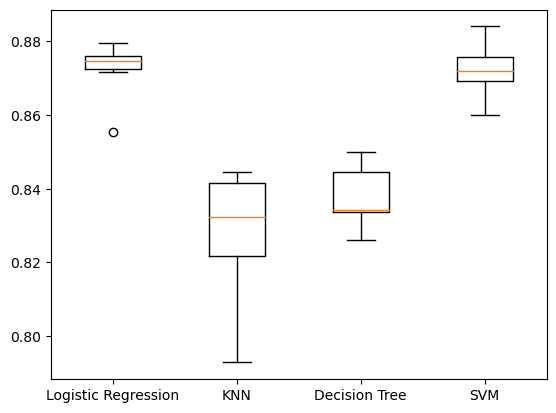

In [85]:
models = {"Logistic Regression": LogisticRegression(solver = 'newton-cg', max_iter = 500, C = 1000),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVM": SVC(gamma='auto')
          }

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)


plt.boxplot(results, labels= models.keys())
plt.show()

#### 4.2 Model Evaluation:

In [86]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))


Logistic Regression Test Set Accuracy: 0.8848086586780054
KNN Test Set Accuracy: 0.8353304986470815
Decision Tree Test Set Accuracy: 0.8438345574023965
SVM Test Set Accuracy: 0.8763045999226904
